<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Food101 dataset
(101 different classese of food):https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/vortexash/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** we start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-28 17:30:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   153MB/s    in 0.7s    

2021-08-28 17:30:04 (153 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial set at the begining of any machine learning project is becoming one with the data

And for a computer vision project... this usually means visualizing many samples of our data

In [2]:
!ls pizza_steak

test  train


In [3]:
 !ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}''")

There are 2 directories and 1 images in 'pizza_steak''
There are 2 directories and 1 images in 'pizza_steak/test''
There are 0 directories and 250 images in 'pizza_steak/test/pizza''
There are 0 directories and 250 images in 'pizza_steak/test/steak''
There are 2 directories and 1 images in 'pizza_steak/train''
There are 0 directories and 750 images in 'pizza_steak/train/pizza''
There are 0 directories and 750 images in 'pizza_steak/train/steak''


In [5]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 28 17:30 .
drwxr-xr-x 1 root root 4096 Aug 28 17:30 ..
-rw-r--r-- 1 root root 6148 Aug 28 17:30 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 28 17:30 test
drwxr-xr-x 4 root root 4096 Aug 28 17:30 train


In [6]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

To visualize our images, first let's get the class name programmaticaly

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
class_names = class_names[1:] # remove .DS.store
print(class_names)

['pizza' 'steak']


In [8]:
 # Let's visualize our images
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 import random

 def view_random_image(target_dir, target_class):
   # Set the target directory (we'll view images from here)

   target_folder = target_dir + target_class

   # Get a random image path
   random_image = random.sample(os.listdir(target_folder),1)
   print(random_image)

   # Read in the image and plot it using matplotlib
   img = mpimg.imread(target_folder + "/" + random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image shape: {img.shape}") # show the shape of the image

   return img

['2247711.jpg']
Image shape: (384, 512, 3)


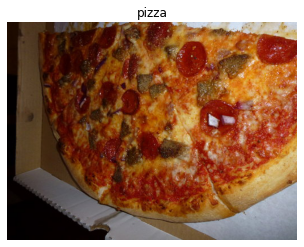

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [10]:
img.dtype

dtype('uint8')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 27,   9,   0],
        [ 27,   9,   0],
        [ 27,   9,   0],
        ...,
        [207, 215, 226],
        [206, 216, 226],
        [207, 217, 227]],

       [[ 28,  10,   0],
        [ 28,  10,   0],
        [ 28,  10,   0],
        ...,
        [206, 214, 225],
        [204, 212, 223],
        [204, 212, 223]],

       [[ 29,  11,   0],
        [ 30,  12,   0],
        [ 30,  12,   0],
        ...,
        [202, 210, 223],
        [202, 210, 223],
        [205, 213, 226]],

       ...,

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [104, 113, 122],
        [102, 111, 120],
        [101, 110, 119]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [100, 109, 118],
        [ 99, 108, 117],
        [ 99, 108, 117]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [ 95, 104, 11

In [12]:
  # View the image shape
  img.shape # returns width, height , colour channels

(384, 512, 3)

**Note:** A we've discussed before, many machine learning ,models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (aslo referred to as **normalize**) their pixel values by dividing the images arrays by 255.(since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1
img/225.

array([[[0.12      , 0.04      , 0.        ],
        [0.12      , 0.04      , 0.        ],
        [0.12      , 0.04      , 0.        ],
        ...,
        [0.92      , 0.95555556, 1.00444444],
        [0.91555556, 0.96      , 1.00444444],
        [0.92      , 0.96444444, 1.00888889]],

       [[0.12444444, 0.04444444, 0.        ],
        [0.12444444, 0.04444444, 0.        ],
        [0.12444444, 0.04444444, 0.        ],
        ...,
        [0.91555556, 0.95111111, 1.        ],
        [0.90666667, 0.94222222, 0.99111111],
        [0.90666667, 0.94222222, 0.99111111]],

       [[0.12888889, 0.04888889, 0.        ],
        [0.13333333, 0.05333333, 0.        ],
        [0.13333333, 0.05333333, 0.        ],
        ...,
        [0.89777778, 0.93333333, 0.99111111],
        [0.89777778, 0.93333333, 0.99111111],
        [0.91111111, 0.94666667, 1.00444444]],

       ...,

       [[0.02666667, 0.        , 0.00888889],
        [0.02666667, 0.        , 0.00888889],
        [0.02666667, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNn 
* Fit the CNN to our training data


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel value between 0 & 1 also called scaling/ normalization)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) 
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size= 3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
     tf.keras.layers.Conv2D(10, 3,activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")                   
])

# Compile our CNN model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 262ms/step - loss: 0.5447 - accuracy: 0.7073 - val_loss: 0.4356 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4329 - accuracy: 0.8060 - val_loss: 0.3299 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3802 - accuracy: 0.8260 - val_loss: 0.3307 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3737 - accuracy: 0.8460 - val_loss: 0.3304 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3521 - accuracy: 0.8473 - val_loss: 0.3298 - val_accuracy: 0.8600


**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure yor're using GPU by goin to runtime change -> Change Runtime Type -> Hardware Accelator -> GPU
(you may have to rerun some cells above)

In [16]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we'vebuilding is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.20343&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):


In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model

model_2 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.9390 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly..let's try 

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data)
                        )
                

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 3.6616 - accuracy: 0.6067 - val_loss: 0.5559 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.7331 - accuracy: 0.6893 - val_loss: 0.6018 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5734 - accuracy: 0.7573 - val_loss: 0.4514 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.9800 - accuracy: 0.6720 - val_loss: 1.2597 - val_accuracy: 0.5900
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.7111 - accuracy: 0.7427 - val_loss: 0.5044 - val_accuracy: 0.7480


In [22]:
# Get a summmary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** We can think of trainable parametetrs as **patterns a model can learn from data**. Intuitively, we might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of differernt learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in de-chipering between different **features** in an image.

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model(start with a baseline)
4. Fir the model
5. Evaluate the model
6. Adjust differernt parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment, experiment,experiment)

## 1. Become one with the data

['482022.jpg']
Image shape: (512, 512, 3)
['3475936.jpg']
Image shape: (512, 512, 3)


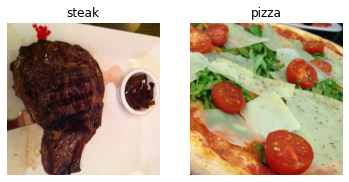

In [28]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")